# BEE 4750 Homework 1: Introduction to Using Julia

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [76]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\mayaz\OneDrive\Desktop\MEng\BEE4750\hw\hw1-mz446`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [51]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings
using Statistics

In [17]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

*In this problem, the colleage incorrectly defined the initial comparison value. By initially setting min_value = 0, every number of the array was being compared to 0 throughout the for loop. Since every number in the array is greater than zero, the final answer was appearing as "0". A simple fix was changing this initial comparison value to infinity, since every number in this array is less than infinity. The new minimum value is "78" which is correct. Since infinity is the largest possible value, this function can be used to find the minimum value of any integer set.*

In [78]:
function minimum(array)
    min_value = Inf;
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

*There were two errors, the first being that "mean" was not defined. After looking at the Julia cheat sheet (https://cheatsheet.juliadocs.org/) to see if "mean" was the proper syntax to calclulate the average, I realized the package for "mean" was missing. I added the Statistics package (which includes "mean") in Julia then used the "using" command to access it here. The second error was that the function was not being called correctly after @show. Instead of just typing the variable you want to find, you must call the function and refer to the data set it is using (class_average(student_grades)).*

In [25]:
using Statistics
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]

function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show class_average(student_grades);


class_average(student_grades) = 94.4


#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

*The error was "MethodError: no method matching setindex!". I searched this error on Google and found a forum (https://stackoverflow.com/questions/32797691/no-method-matching-setindex-trying-to-change-matrix-values) that explained that the empty matrix may have been established incorrectly. Upon further inspection I realized that the code initially read "zero(n_trials)", when "zeros(n_trials)" is the correct syntax.*

In [37]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zeros(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.38


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

*The purpose of the mystery function is to create a vector comprised of unique values from the list of input values. It works by cycling through each value in the list of inputs. "y" starts off as an empty vector. If a value from the input vector is not yet in y, that value is appended to the y vector. I know this from looking at the Julia cheat sheet (https://cheatsheet.juliadocs.org/) that explains !true == false, so !(v in y) must mean "v is not in y". I also gathered this from the code output, which does not contain duplicate values from the input vector.*

In [80]:
function mystery_function(values)
    y = [] #initalize the array y
    for v in values #sequentially examine each input value
        if !(v in y) #if an input value v is not yet in y...
            append!(y, v) #...then append v to array y
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


*"unique" is the built-in Julia function that removes duplicate values from a set of inputs. I could not find this function on the Julia cheat sheet; instead I found it on a forum through Google (https://discourse.julialang.org/t/delete-duplicate-rows-in-a-dataframe/65487).*

In [49]:
list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
unique(list_of_values)

4-element Vector{Int64}:
 1
 2
 3
 4

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.

*To calculate the sum of the vector terms, I create a for loop that added one vector value to the next sequential vector value. The next vector value was added to the sum of these values and so on. I calculated the average by dividing the total value by the number of values (the length of the vector). Initially, I tried to use "sum" as the variable name but received the error "cannot assign a value to imported variable Base.sum from module Main". I had trouble finding the solution to this error online, so I entered it to ChatGPT. The problem was that "sum" is a command already used within Julia, so that word cannot be a variable name. So, I renamed it "total". The complete ChatGPT solution was as follows:* 


The error message you're seeing, "cannot assign a value to imported variable Base.sum from module Main", occurs because you're trying to assign a value to a function or variable that is already defined in Julia's Base module. In this case, Base.sum is a built-in function in Julia used for summing elements of an array or collection.

Why This Error Occurs:
Base Module Protection: The Base module is the core module in Julia that contains standard functions and methods. When you use a name like sum, which is already defined in Base, Julia protects it to avoid accidental overwriting.

Attempting to Redefine Base.sum: If you try to assign something like sum = 5 or even redefine sum with a new function, Julia will raise this error to prevent conflicts and maintain the integrity of its base functions.

How to Resolve This Error:
Use a Different Variable Name: Choose a different name for your variable or function that does not conflict with Julia's built-in names. For example, instead of sum, use my_sum, total_sum, or any name that isn't already defined in Base.

Explicit Local Redefinition (not recommended generally): You can technically override a function in your current scope using Base's @eval macro, but this is not recommended because it can lead to unexpected behavior and make your code harder to maintain. Instead, try to avoid name conflicts by picking unique names.

Example:
Let's say you tried to write:

julia
sum = [1, 2, 3]
This would raise the error because sum is already defined in Base. Instead, use:

julia
my_sum = [1, 2, 3]
By choosing a different name, you avoid the conflict with Julia's built-in functions.


*I found the syntax for creating a random vector od a designated length in the aforementioned Julia cheat sheet. To learn the broadcasting function, I followed a webpage (https://blog.glcs.io/broadcasting) that stated I could put a dot before a command to apply it to all terms within a vector.*

In [81]:
function compute_mean(v)
    total = 0;
    for i = 1:length(v)
        total = total + v[i] #sum the terms in vector v
    end

    avg = total/length(v) #compute the average of vector v
    
    return avg
end

@show random_vect = rand(Int8,10) #create random vector of 10 integers
@show compute_mean(random_vect)
new_vect = random_vect .- compute_mean(random_vect) #create a new vector, subtracting the mean of random_vect from each term in random_vect
@show round(Int, compute_mean(new_vect)) #compute the mean of the new vector and round to an integer value


random_vect = rand(Int8, 10) = Int8[26, -7, 70, -24, -124, -100, 68, -62, -17, 64]
compute_mean(random_vect) = -10.6
round(Int, compute_mean(new_vect)) = 0


0

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

*In this problem, we are told the that X1 and X2 are the amount of wastewater being disposed of by land and chemically treated, respectively. I used the LaTeX syntax to label the corresponding edge labels. 20% of the land disposed YUK gets into Pristine Brook. Using the chemical treatment method, we can use the efficiency equation to figure out how much YUK will still get into Pristine Brook: X2 - (removal efficiency * X2). The simplified equation is provided in the corresponding edge label. There is no equation in terms of direct disposal from the plant to the brook, but we know it must be <= 20 kg.*

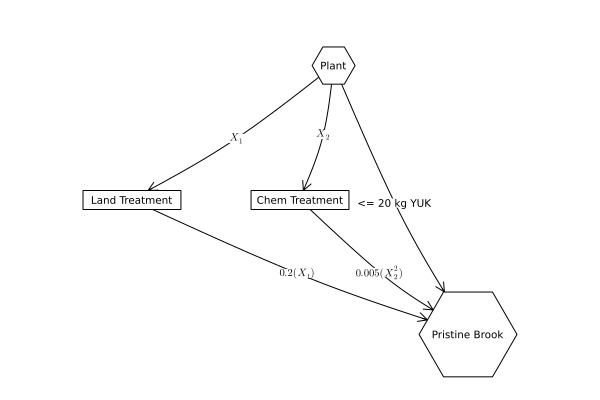

In [86]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"X_1", (1,3) => L"X_2", (1, 4) => "<= 20 kg YUK",(2, 4) => L"0.2(X_1)",(3, 4) => L"0.005(X_2^2)")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?



*Please see the mathemmatical model in LaTeX syntax in the diagram above.*

*I tried to use the random function to create various inputs but was getting very small values in return. So, I came up with 5 combinations of percentage distrubtions for the disposal methods of YUK. Based on these percentage combinations that I randomly assigned, I did not find a treatment plan that satisfied the YUK effluent standard. Based on my graph, I saw no pattern of tradeoff, but I know from the equations that Method 2 is generally more expensive. To find a better solution, I would need to create many more sets of solutions and compare to find the one that yield the least amount of YUK in the brook at the lowest cost.*

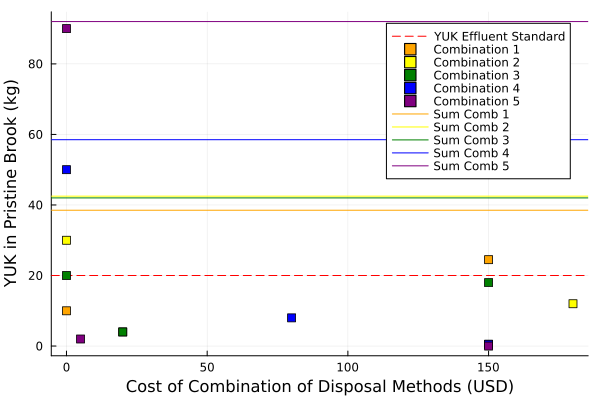

In [75]:
function waste_disposal(wastewater, per_brook, per_land, per_chemical) #where wastewater is the amount of wastewater in m^3, and per_X is the percentage of wastewater disposed of through each method (use decimal inputs)
    kg_yuk = wastewater * 1 #1:1 ratio if wastewater is in m^3 (1 kg/m^3 of YUK)

    kg_yuk_brook = kg_yuk*per_brook #no YUK is filtered out; all YUK disposed in the brook stays there
    cost_brook =  0 #no cost to company to dispose YUK directly in brook

    kg_yuk_land = 0.2*kg_yuk*per_land #20% of YUK disposed on land will end up in brook 
    cost_land = ((wastewater*per_land)^2)/20 #cost is X_1^2/20 dollars per day, per X_1 is the amount of wastewater disposed on land

    kg_yuk_chemical = 0.005*(per_chemical*wastewater)^2 #amount of YUK that gets into the brook after calculating efficiency
    cost_chemical = 1.50*wastewater #cost of treating wastewater

    return (kg_yuk_brook, kg_yuk_land, kg_yuk_chemical, cost_brook, cost_land,  cost_chemical)
end

#Create solution variables based on various inputs to the function
b1,l1,c1,cb1,cl1,cc1 = waste_disposal(100, .1, .2, .7)
b2,l2,c2,cb2,cl2,cc2 = waste_disposal(100, .3, .6, .1)
b3,l3,c3,cb3,cl3,cc3 = waste_disposal(100, .2, .2, .6)
b4,l4,c4,cb4,cl4,cc4 = waste_disposal(100, .5, .4, .1)
b5,l5,c5,cb5,cl5,cc5 = waste_disposal(100, .9, .1, 0)

#Create vectors from solution variables
x1, y1 = [cb1,cl1,cc1],[b1,l1,c1]
x2, y2 = [cb2,cl2,cc2],[b2,l2,c2]
x3, y3 = [cb3,cl3,cc3],[b3,l3,c3]
x4, y4 = [cb4,cl4,cc4],[b4,l4,c4]
x5, y5 = [cb5,cl5,cc5],[b5,l5,c5]

#Create a horizontal line showing the YUK effluent standard 
hline([20], linestyle=:dash, seriescolor=:red, label= "YUK Effluent Standard")

#Create scatter plots based on solution variables
scatter!(x1,y1,markershape=:square, seriescolor=:orange, label="Combination 1")
scatter!(x2,y2,markershape=:square, seriescolor=:yellow, label="Combination 2")
scatter!(x3,y3,markershape=:square, seriescolor=:green, label="Combination 3")
scatter!(x4,y4,markershape=:square, seriescolor=:blue, label="Combination 4")
scatter!(x5,y5,markershape=:square, seriescolor=:purple, label="Combination 5")

#Sum the total kg of YUK going into the brook with the given combination of disposal methods and show as horizontaal line for easy comparison to YUK Effluent Standard
hline!([sum(y1)],seriescolor=:orange,label="Sum Comb 1")
hline!([sum(y2)],seriescolor=:yellow,label="Sum Comb 2")
hline!([sum(y3)],seriescolor=:green,label="Sum Comb 3")
hline!([sum(y4)],seriescolor=:blue,label="Sum Comb 4")
hline!([sum(y5)],seriescolor=:purple,label="Sum Comb 5")




xlabel!("Cost of Combination of Disposal Methods (USD)")
ylabel!("YUK in Pristine Brook (kg)")



### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

*For this problem, I used the iseven() function and a comprehension to create a vector of true or false values, where true values represented even numbers and false values odd. The true values were represented as ones, and the false as zeros. Then, I used the Julia count function to count the number of zeros in the vector (I knew about this function from MATLAB, but found the Julia syntax here: https://www.geeksforgeeks.org/counting-number-of-elements-in-an-array-in-julia-count-method/)*

In [83]:
x = [iseven(i) for i in 0:1:149] #assign true or false values (even or odd) for numbers 0 through 149
println(count(i->(i==0),x)) #count and report the number of zeros

75


#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

*To create this function, I created a for loop. Instead of reporting the coefficient vector of "a" backwards, I created the for loop so that as the vector terms are sequentially applied (e.g. 1,2,3,etc.), the power terms of x are applied backwards (e.g. 3,2,1).*

In [85]:
function polynomial(x,a)
   q = 0;
   k = length(a);
    for i = 1:length(a)
        k = k-1; #k starts at a power one less than the length of the vector, decreasing each iteration, so that the final term has no x variable
        p = a[i]*x^k; 
        q = p+q; #calculate the sum of the vector terms
    end 
    q=q #restate q so that the retur command recognizes this variable
    return q
end

@show polynomial(2,[2,-1,0,1])

polynomial(2, [2, -1, 0, 1]) = 13


13

## References

List any external references consulted, including classmates.

Question 4 multiple plots same graph: https://discourse.julialang.org/t/plotting-multiple-figures-using-plots-jl/57859
Question 4 color and dash style of line: https://www.matecdev.com/posts/julia-plotting-linestyle-markers.html
Horiizontal line https://discourse.julialang.org/t/how-to-specify-the-span-of-hline-in-plots-jl/59539
